In [8]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

In [2]:
#Import data file into notebook
data = pd.read_csv("../Data/forestfires.csv")

In [3]:
clean_data = data.drop_duplicates()

In [4]:
#Making a new columns with numerical days and months as well as a date column

day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

In [5]:
clean_data['month_num']=clean_data['month'].map(month_mapping)
clean_data['day_num']=clean_data['day'].map(day_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_24060\1388035913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['month_num']=clean_data['month'].map(month_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_24060\1388035913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['day_num']=clean_data['day'].map(day_mapping)


In [6]:
clean_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,5
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6


In [7]:
#create a new column for 'area' where 'area' is converted to squared km
#1 hectare = 0.01 squared km


clean_data['area_squared_km'] = clean_data['area'] * 0.01

C:\Users\user\AppData\Local\Temp\ipykernel_24060\3797116708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['area_squared_km'] = clean_data['area'] * 0.01


In [11]:
#Create new column with spread

clean_data['fire_spread'] = clean_data['area_squared_km'] 

C:\Users\user\AppData\Local\Temp\ipykernel_24060\2248922252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fire_spread'] = clean_data['area_squared_km']


In [12]:
clean_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,1,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,5,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6,0.0,0.0


In [13]:
# Create bins

# large fire is 2 squared-km as per website: https://www.epa.gov/climate-indicators/climate-change-indicators-wildfires
# 0 = minimal spread, 1 = moderate spread, 2= large spread

bins = [0, 0.001, 0.065700, 11]
labels = ['0', '1', '2']

clean_data['fire_spread'] = pd.cut(clean_data['fire_spread'], bins, labels=labels)

print(clean_data)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num  area_squared_km fire_sprea

C:\Users\user\AppData\Local\Temp\ipykernel_24060\3788578603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fire_spread'] = pd.cut(clean_data['fire_spread'], bins, labels=labels)


In [14]:
#fill 0 with 0
clean_data['fire_spread'] = clean_data['fire_spread'].fillna('0')

C:\Users\user\AppData\Local\Temp\ipykernel_24060\854909942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fire_spread'] = clean_data['fire_spread'].fillna('0')


In [37]:
clean_data.dtypes

X                      int64
Y                      int64
month                 object
day                   object
FFMC                 float64
DMC                  float64
DC                   float64
ISI                  float64
temp                 float64
RH                     int64
wind                 float64
rain                 float64
area                 float64
month_num              int64
day_num                int64
area_squared_km      float64
fire_spread         category
large_fire_check        bool
dtype: object

X                      int64
Y                      int64
month                 object
day                   object
FFMC                 float64
DMC                  float64
DC                   float64
ISI                  float64
temp                 float64
RH                     int64
wind                 float64
rain                 float64
area                 float64
month_num              int64
day_num                int64
area_squared_km      float64
fire_spread         category
large_fire_check        bool
dtype: object

In [21]:
#checking fire_spread data type


In [16]:
bymonth=clean_data

In [40]:

bymonth['large_fire_check']=bymonth['fire_spread']== '2'


C:\Users\user\AppData\Local\Temp\ipykernel_24060\2492910209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bymonth['large_fire_check']=bymonth['fire_spread']== '2'


In [41]:
print(bymonth.head())
print(bymonth.tail())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   month_num  day_num  area_squared_km fire_spread  large_fire_check  
0          3        4              0.0           0             False  
1         10        1              0.0           0             False  
2         10        5              0.0           0             False  
3          3        4              0.0           0             False  
4          3        6              0.0           0             False  
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27

In [49]:

groupby_calcs=bymonth.groupby('month')['large_fire_check'].agg(['sum', 'count'])
groupby_calcs.reset_index(inplace=True)
groupby_calcs

,month,sum,count
0,apr,2,9
1,aug,38,182
2,dec,8,9
3,feb,5,20
4,jan,0,2
5,jul,8,32
6,jun,3,16
7,mar,11,53
8,may,1,2
9,nov,0,1


In [166]:
bymonth['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [185]:
months=['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan','dec', 'may', 'nov']
#get month fire proportion dictionary

#bymonth[months].count()
# Initialize an empty dictionary to store the counts
month_counts = {}

# Loop through each month and count the rows matching that month
for month in months:
    count = (bymonth['month'] == month).sum()
    month_counts[month] = count

# Print the dictionary of counts
print(month_counts)

{'mar': 53, 'oct': 15, 'aug': 182, 'sep': 172, 'apr': 9, 'jun': 16, 'jul': 32, 'feb': 20, 'jan': 2, 'dec': 9, 'may': 2, 'nov': 1}


In [186]:
month_counts = pd.DataFrame.from_dict(month_counts, orient='index', columns=['totals'])

In [191]:
month_counts
month_counts.index.name = 'month'
month_counts.reset_index(inplace=True)

In [132]:
#adding adjusted indexes 
index_columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
groupby_calc_indexes=bymonth.groupby('month')[index_columns].mean()

In [137]:
groupby_calc_indexes.reset_index(inplace=True)
groupby_calc_indexes

,index,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0,apr,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000
1,1,aug,92.343407,154.028571,641.224176,11.082967,21.648352,45.543956,4.074725,0.059341
2,2,dec,84.966667,26.122222,351.244444,3.466667,4.522222,38.444444,7.644444,0.000000
3,3,feb,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000
4,4,jan,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000
5,5,jul,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250
6,6,jun,89.325000,93.337500,301.806250,12.068750,20.575000,45.562500,4.112500,0.000000
7,7,mar,89.401887,34.518868,75.850943,7.094340,13.009434,40.245283,4.969811,0.003774
8,8,may,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000
9,9,nov,79.500000,3.000000,106.700000,1.100000,11.800000,31.000000,4.500000,0.000000


In [163]:
selected_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Calculate the mean of the selected columns
column_means = bymonth[selected_columns].mean()

# convert to dict
column_means=column_means.to_dict()
type(column_means)
total_fires=bymonth.shape[0]
total_fires
bymonth[selected_columns].mean()

FFMC     90.637427
DMC     110.989279
DC      549.155166
ISI       9.023587
temp     18.887524
RH       44.348928
wind      4.010526
rain      0.021832
dtype: float64

In [193]:
groupby_calc_indexes=groupby_calc_indexes.merge(month_counts, on='month')

In [183]:
month_counts=pd.DataFrame(month_counts,index=['month'])


In [195]:
groupby_calc_indexes['totals']

0       9
1     182
2       9
3      20
4       2
5      32
6      16
7      53
8       2
9       1
10     15
11    172
Name: totals, dtype: int64

In [199]:
#adding fequency adjusted monthly means 
for index in index_columns:
    groupby_calc_indexes[index+'_month_avg_adj']=(groupby_calc_indexes[index]*groupby_calc_indexes['totals']/(total_fires))+(column_means[index]*(1-(groupby_calc_indexes['totals']/total_fires)))
    #groupby_calc_indexes[index+'_month_avg_adj']=((groupby_calc_indexes[index]*month_fire_proportion[index])+column_means[index]*(1-month_fire_proportion[index]))


In [162]:
column_means

{'FFMC': 90.6374269005848,
 'DMC': 110.98927875243665,
 'DC': 549.1551656920078,
 'ISI': 9.023586744639378,
 'temp': 18.887524366471734,
 'RH': 44.34892787524367,
 'wind': 4.010526315789474,
 'rain': 0.021832358674463936}

In [200]:
groupby_calc_indexes

,index,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,FFMC_month_avg_adj,DMC_month_avg_adj,DC_month_avg_adj,ISI_month_avg_adj,temp_month_avg_adj,RH_month_avg_adj,wind_month_avg_adj,rain_month_avg_adj,totals
0,0,apr,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000,90.552365,109.321241,540.372716,8.959625,18.767470,44.393489,4.022038,0.021449,9
1,1,aug,92.343407,154.028571,641.224176,11.082967,21.648352,45.543956,4.074725,0.059341,91.242667,126.258579,581.819025,9.754205,19.866999,44.772895,4.033303,0.035139,182
2,2,dec,84.966667,26.122222,351.244444,3.466667,4.522222,38.444444,7.644444,0.000000,90.537940,109.500383,545.683048,8.926097,18.635502,44.245340,4.074279,0.021449,9
3,3,feb,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000,90.335968,107.031607,529.876992,8.802394,18.526802,44.791465,4.000564,0.020981,20
4,4,jan,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000,90.480556,110.565929,547.366452,8.994060,18.834357,44.523006,4.002688,0.021747,2
5,5,jul,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250,90.680511,110.951741,543.007670,9.046677,19.088498,44.397338,3.993301,0.020860,32
6,6,jun,89.325000,93.337500,301.806250,12.068750,20.575000,45.562500,4.112500,0.000000,90.596494,110.438736,541.440580,9.118563,18.940155,44.386778,4.013707,0.021151,16
7,7,mar,89.401887,34.518868,75.850943,7.094340,13.009434,40.245283,4.969811,0.003774,90.509779,103.088827,500.256289,8.824269,18.280236,43.924965,4.109634,0.019967,53
8,8,may,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000,90.624610,110.660666,547.379707,9.006341,18.871004,44.437236,4.012240,0.021747,2
9,9,nov,79.500000,3.000000,106.700000,1.100000,11.800000,31.000000,4.500000,0.000000,90.615717,110.778773,548.292680,9.008141,18.873709,44.322907,4.011480,0.021790,1


In [201]:
bymonth=bymonth.merge(groupby_calcs, how='inner',on='month')

In [57]:
bymonth.drop('large_fire_total', axis=1, inplace=True)

In [59]:
bymonth.head()



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_check,sum,count
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4,0.0,0,False,11,53
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4,0.0,0,False,11,53
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6,0.0,0,False,11,53
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.0,3,5,0.0,0,False,11,53
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.0,3,2,0.0,0,False,11,53


In [62]:
bymonth.rename(columns={'sum': 'total_large_fires','count':'total_months_fires'},inplace=True)

In [64]:
bymonth['large_f_odds_month']=bymonth['total_large_fires']/bymonth['total_months_fires']

In [241]:
bymonth['area'][bymonth['month']=='dec']

501     8.98
502    11.19
503     5.38
504    17.85
505    10.73
506    22.03
507     9.77
508     9.27
509    24.77
Name: area, dtype: float64

In [66]:
bymonth['large_f_odds']=bymonth['large_fire_check'].sum()/bymonth['large_fire_check'].count()

In [67]:
bymonth['large_f_odds']

0      0.251462
1      0.251462
2      0.251462
3      0.251462
4      0.251462
         ...   
508    0.251462
509    0.251462
510    0.251462
511    0.251462
512    0.251462
Name: large_f_odds, Length: 513, dtype: float64

In [69]:
bymonth['month_risk_delta']=bymonth['large_f_odds_month']-bymonth['large_f_odds']

In [75]:
bymonth.groupby('month')['month_risk_delta'].mean()

month
apr   -0.029240
aug   -0.042671
dec    0.637427
feb   -0.001462
jan   -0.251462
jul   -0.001462
jun   -0.063962
mar   -0.043915
may    0.248538
nov   -0.251462
oct    0.015205
sep    0.033422
Name: month_risk_delta, dtype: float64

In [76]:
bymonth['month_risk_delta']*

0     -0.043915
1     -0.043915
2     -0.043915
3     -0.043915
4     -0.043915
         ...   
508    0.637427
509    0.637427
510    0.248538
511    0.248538
512   -0.251462
Name: month_risk_delta, Length: 513, dtype: float64

In [77]:
bymonth['month_fire_proportion']=bymonth['total_months_fires']/bymonth['fire_spread'].count()

In [288]:
bymonth['total_large_fires']/

0      11
1      11
2      11
3      11
4      11
       ..
508     8
509     8
510     1
511     1
512     0
Name: total_large_fires, Length: 513, dtype: int64

In [80]:
bymonth['month_fire_proportion'].unique()

array([0.10331384, 0.02923977, 0.35477583, 0.33528265, 0.01754386,
       0.03118908, 0.06237817, 0.03898635, 0.00389864, 0.00194932])

In [82]:
bymonth['large_f_odds_month'].unique()

array([0.20754717, 0.26666667, 0.20879121, 0.28488372, 0.22222222,
       0.1875    , 0.25      , 0.        , 0.88888889, 0.5       ])

bymonth['large_f_odds_month_adjusted']= (probability of large fire in given month)*(proportion of  fires in given month compared to all fires)+(probability of large fire in entire dataset)*(1-(proportion of  fires in given month  to all fires))

$$
\text{large_f_odds_month_adjusted} = \text{P of Large Fire in Given Month} \times (\text{Proportion of Fires in Given Month Compared to All Fires}) + \text{P of Large Fire in Entire Dataset} \times (1 - \text{Proportion of Fires in Given Month Compared to All Fires})
$$



In [103]:
bymonth['large_f_odds_month_adjusted']=((bymonth['large_f_odds_month']*bymonth['month_fire_proportion'])+bymonth['large_f_odds']*(1-bymonth['month_fire_proportion']))

Bayesian Prior 

In [295]:
bymonth['large_f_odds_month_bayesian'] = bymonth['large_f_odds'] * bymonth['total_large_fires'] / total_large_fires

In [296]:
large_fire_odds_columns=['large_f_odds_month_bayesian','large_f_odds_month_adjusted','large_f_odds_month','total_months_fires','total_large_fires','large_fire_share_bymonth','month_fire_proportion']
bymonth.groupby('month')[large_fire_odds_columns].agg('mean')

,large_f_odds_month_bayesian,large_f_odds_month_adjusted,large_f_odds_month,total_months_fires,total_large_fires,large_fire_share_bymonth,month_fire_proportion
month,,,,,,,
apr,0.003899,0.250949,0.222222,9.0,2.0,0.015504,0.017544
aug,0.074074,0.236323,0.208791,182.0,38.0,0.294574,0.354776
dec,0.015595,0.262645,0.888889,9.0,8.0,0.062016,0.017544
feb,0.009747,0.251405,0.250000,20.0,5.0,0.038760,0.038986
jan,0.000000,0.250482,0.000000,2.0,0.0,0.000000,0.003899
jul,0.015595,0.251371,0.250000,32.0,8.0,0.062016,0.062378
jun,0.005848,0.249467,0.187500,16.0,3.0,0.023256,0.031189
mar,0.021442,0.246925,0.207547,53.0,11.0,0.085271,0.103314
may,0.001949,0.252431,0.500000,2.0,1.0,0.007752,0.003899


In [298]:
test=bymonth.groupby('month')[large_fire_odds_columns].agg('mean')
test['large_f_odds_month_bayesian'].sum()

0.25146198830409355

In [272]:
total_large_fires=bymonth['large_fire_check'].sum()
total_large_fires

129

In [274]:
bymonth['large_fire_share_bymonth'] = bymonth['total_large_fires']/total_large_fires
bymonth['large_fire_share_bymonth'].unique()

array([0.08527132, 0.03100775, 0.29457364, 0.37984496, 0.01550388,
       0.02325581, 0.0620155 , 0.03875969, 0.        , 0.00775194])

In [104]:
bymonth['large_f_odds_month_adjusted'].unique()

array([0.24692498, 0.25190657, 0.23632343, 0.26266772, 0.25094901,
       0.24946707, 0.25137079, 0.25140499, 0.25048163, 0.26264492,
       0.25243095, 0.25097181])

In [109]:
columns_to_group=['large_f_odds_month','large_f_odds_month_adjusted','large_f_odds','total_months_fires','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
bymonth.groupby('month')[columns_to_group].agg('mean')

,large_f_odds_month,large_f_odds_month_adjusted,large_f_odds,total_months_fires,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,,,,,,,,,,,,,
apr,0.222222,0.250949,0.251462,9.0,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000,8.891111
aug,0.208791,0.236323,0.251462,182.0,92.343407,154.028571,641.224176,11.082967,21.648352,45.543956,4.074725,0.059341,12.626319
dec,0.888889,0.262645,0.251462,9.0,84.966667,26.122222,351.244444,3.466667,4.522222,38.444444,7.644444,0.000000,13.330000
feb,0.250000,0.251405,0.251462,20.0,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000,6.275000
jan,0.000000,0.250482,0.251462,2.0,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000,0.000000
jul,0.250000,0.251371,0.251462,32.0,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250,14.369687
jun,0.187500,0.249467,0.251462,16.0,89.325000,93.337500,301.806250,12.068750,20.575000,45.562500,4.112500,0.000000,6.206250
mar,0.207547,0.246925,0.251462,53.0,89.401887,34.518868,75.850943,7.094340,13.009434,40.245283,4.969811,0.003774,3.898113
may,0.500000,0.252431,0.251462,2.0,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000,19.240000


In [111]:
sort_by_risk=bymonth.groupby('month')[columns_to_group].agg('mean')
sort_by_risk=sort_by_risk.sort_values(by='large_f_odds_month_adjusted')
sort_by_risk.reset_index(inplace=True)
sort_by_risk

,month,large_f_odds_month,large_f_odds_month_adjusted,large_f_odds,total_months_fires,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,aug,0.208791,0.236323,0.251462,182.0,92.343407,154.028571,641.224176,11.082967,21.648352,45.543956,4.074725,0.059341,12.626319
1,mar,0.207547,0.246925,0.251462,53.0,89.401887,34.518868,75.850943,7.094340,13.009434,40.245283,4.969811,0.003774,3.898113
2,jun,0.187500,0.249467,0.251462,16.0,89.325000,93.337500,301.806250,12.068750,20.575000,45.562500,4.112500,0.000000,6.206250
3,jan,0.000000,0.250482,0.251462,2.0,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000,0.000000
4,apr,0.222222,0.250949,0.251462,9.0,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000,8.891111
5,nov,0.000000,0.250972,0.251462,1.0,79.500000,3.000000,106.700000,1.100000,11.800000,31.000000,4.500000,0.000000,0.000000
6,jul,0.250000,0.251371,0.251462,32.0,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250,14.369687
7,feb,0.250000,0.251405,0.251462,20.0,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000,6.275000
8,oct,0.266667,0.251907,0.251462,15.0,90.453333,41.420000,681.673333,7.146667,17.093333,37.466667,3.460000,0.000000,6.638000
9,may,0.500000,0.252431,0.251462,2.0,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000,19.240000


In [289]:
bymonth.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'month_num', 'day_num', 'area_squared_km',
       'fire_spread', 'large_fire_check', 'total_large_fires',
       'total_months_fires', 'large_f_odds_month', 'large_f_odds',
       'month_risk_delta', 'month_fire_proportion',
       'large_f_odds_month_adjusted', 'sum', 'count', 'month_fire_porportion',
       'large_fire_share_bymonth', 'large_f_odds_month_bayesian'],
      dtype='object')

In [122]:
bymonth.corr()['large_f_odds_month_adjusted'].sort_values()

C:\Users\user\AppData\Local\Temp\ipykernel_24060\10307847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bymonth.corr()['large_f_odds_month_adjusted'].sort_values()


ISI                           -0.256789
DMC                           -0.242435
temp                          -0.187969
month_fire_proportion         -0.128481
total_months_fires            -0.128481
FFMC                          -0.115684
wind                          -0.089626
rain                          -0.084050
RH                            -0.063731
day_num                       -0.050260
Y                             -0.045563
X                             -0.010696
area                           0.035398
area_squared_km                0.035398
large_fire_check               0.104916
DC                             0.148403
total_large_fires              0.200600
month_num                      0.240894
month_risk_delta               0.476943
large_f_odds_month             0.476943
large_f_odds_month_adjusted    1.000000
large_f_odds                        NaN
Name: large_f_odds_month_adjusted, dtype: float64

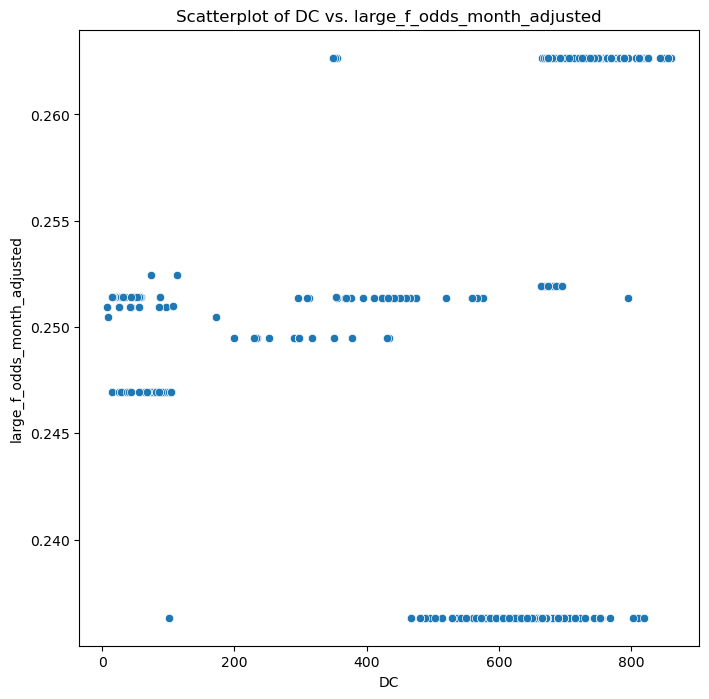

In [129]:
sns.scatterplot(data=bymonth, x='DC', y='large_f_odds_month_adjusted')

# Set plot labels and title
plt.xlabel("DC")
plt.ylabel("large_f_odds_month_adjusted")
plt.title("Scatterplot of DC vs. large_f_odds_month_adjusted")

# Show the plot
plt.show()

In [ ]:
bymonth['DC_mean_adjusted']=((bymonth['large_f_odds_month']*bymonth['month_fire_proportion'])+bymonth['large_f_odds']*(1-bymonth['month_fire_proportion']))

In [ ]:
how to replace the values in these columns ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain'] with 

((groupby_calc_indexes['FFMC']*groupby_calc_indexes['month_fire_proportion'])+groupby_calc_indexes['FFMC']*(1-groupby_calc_indexes['month_fire_proportion']))

In [202]:
bymonth.corr()['large_f_odds_month_adjusted'].sort_values()

C:\Users\user\AppData\Local\Temp\ipykernel_24060\10307847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bymonth.corr()['large_f_odds_month_adjusted'].sort_values()


ISI                           -0.256789
DMC                           -0.242435
temp                          -0.187969
month_fire_porportion         -0.128481
month_fire_proportion         -0.128481
total_months_fires            -0.128481
count                         -0.128481
FFMC                          -0.115684
wind                          -0.089626
rain                          -0.084050
RH                            -0.063731
day_num                       -0.050260
Y                             -0.045563
X                             -0.010696
area                           0.035398
area_squared_km                0.035398
large_fire_check               0.104916
DC                             0.148403
total_large_fires              0.200600
sum                            0.200600
month_num                      0.240894
month_risk_delta               0.476943
large_f_odds_month             0.476943
large_f_odds_month_adjusted    1.000000
large_f_odds                        NaN


In [203]:
bymonth

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,total_large_fires,total_months_fires,large_f_odds_month,large_f_odds,month_risk_delta,month_fire_proportion,large_f_odds_month_adjusted,sum,count,month_fire_porportion
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,11,53,0.207547,0.251462,-0.043915,0.103314,0.246925,11,53,0.103314
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,11,53,0.207547,0.251462,-0.043915,0.103314,0.246925,11,53,0.103314
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,11,53,0.207547,0.251462,-0.043915,0.103314,0.246925,11,53,0.103314
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,...,11,53,0.207547,0.251462,-0.043915,0.103314,0.246925,11,53,0.103314
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,...,11,53,0.207547,0.251462,-0.043915,0.103314,0.246925,11,53,0.103314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,...,8,9,0.888889,0.251462,0.637427,0.017544,0.262645,8,9,0.017544
509,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,...,8,9,0.888889,0.251462,0.637427,0.017544,0.262645,8,9,0.017544
510,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,...,1,2,0.500000,0.251462,0.248538,0.003899,0.252431,1,2,0.003899
511,4,3,may,fri,89.6,25.4,73.7,5.7,18.0,40,...,1,2,0.500000,0.251462,0.248538,0.003899,0.252431,1,2,0.003899


In [215]:
adjusted_columns=['month','FFMC_month_avg_adj', 'DMC_month_avg_adj', 'DC_month_avg_adj',
       'ISI_month_avg_adj', 'temp_month_avg_adj', 'RH_month_avg_adj',
       'wind_month_avg_adj', 'rain_month_avg_adj']
groupby_calc_indexes[adjusted_columns]

,month,FFMC_month_avg_adj,DMC_month_avg_adj,DC_month_avg_adj,ISI_month_avg_adj,temp_month_avg_adj,RH_month_avg_adj,wind_month_avg_adj,rain_month_avg_adj
0,apr,90.552365,109.321241,540.372716,8.959625,18.767470,44.393489,4.022038,0.021449
1,aug,91.242667,126.258579,581.819025,9.754205,19.866999,44.772895,4.033303,0.035139
2,dec,90.537940,109.500383,545.683048,8.926097,18.635502,44.245340,4.074279,0.021449
3,feb,90.335968,107.031607,529.876992,8.802394,18.526802,44.791465,4.000564,0.020981
4,jan,90.480556,110.565929,547.366452,8.994060,18.834357,44.523006,4.002688,0.021747
5,jul,90.680511,110.951741,543.007670,9.046677,19.088498,44.397338,3.993301,0.020860
6,jun,90.596494,110.438736,541.440580,9.118563,18.940155,44.386778,4.013707,0.021151
7,mar,90.509779,103.088827,500.256289,8.824269,18.280236,43.924965,4.109634,0.019967
8,may,90.624610,110.660666,547.379707,9.006341,18.871004,44.437236,4.012240,0.021747
9,nov,90.615717,110.778773,548.292680,9.008141,18.873709,44.322907,4.011480,0.021790


In [216]:
bymonth_expanded=bymonth.merge(groupby_calc_indexes[adjusted_columns], how='inner',on='month')



In [217]:
bymonth_expanded.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_24060\2793635481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bymonth_expanded.corr()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,count,month_fire_porportion,FFMC_month_avg_adj,DMC_month_avg_adj,DC_month_avg_adj,ISI_month_avg_adj,temp_month_avg_adj,RH_month_avg_adj,wind_month_avg_adj,rain_month_avg_adj
X,1.000000,0.542705,-0.020499,-0.048861,-0.088801,0.006033,-0.051070,0.083757,0.020869,0.065176,...,-0.160690,-0.160690,-0.100014,-0.084761,-0.115924,-0.036226,-0.074844,0.025395,0.063456,-0.013298
Y,0.542705,1.000000,-0.045979,0.008210,-0.098496,-0.023142,-0.023871,0.062587,-0.019537,0.033313,...,-0.108525,-0.108525,-0.053391,-0.045707,-0.119007,0.005394,-0.046169,0.045013,0.106539,0.031113
FFMC,-0.020499,-0.045979,1.000000,0.383641,0.332936,0.532083,0.431609,-0.300827,-0.029208,0.056806,...,0.345054,0.345054,0.348501,0.282030,0.232433,0.227701,0.300607,0.023777,-0.068168,0.146421
DMC,-0.048861,0.008210,0.383641,1.000000,0.681741,0.304585,0.469590,0.071711,-0.105111,0.074780,...,0.633295,0.633295,0.671582,0.645932,0.518670,0.506361,0.668879,0.251990,-0.171786,0.353978
DC,-0.088801,-0.098496,0.332936,0.681741,1.000000,0.228168,0.497584,-0.044067,-0.203010,0.035690,...,0.783120,0.783120,0.638074,0.597944,0.895479,0.278060,0.642088,-0.069494,-0.618921,0.046303
ISI,0.006033,-0.023142,0.532083,0.304585,0.228168,1.000000,0.394217,-0.133363,0.106825,0.067664,...,0.294063,0.294063,0.392687,0.366723,0.174682,0.355420,0.383735,0.203270,0.038887,0.282994
temp,-0.051070,-0.023871,0.431609,0.469590,0.497584,0.394217,1.000000,-0.528670,-0.227618,0.069526,...,0.460207,0.460207,0.519659,0.485582,0.404334,0.384653,0.534465,0.173722,-0.174857,0.246640
RH,0.083757,0.062587,-0.300827,0.071711,-0.044067,-0.133363,-0.528670,1.000000,0.071433,0.099616,...,-0.021604,-0.021604,0.011591,0.051590,-0.012341,0.057461,0.048991,0.132535,0.024111,0.068153
wind,0.020869,-0.019537,-0.029208,-0.105111,-0.203010,0.106825,-0.227618,0.071433,1.000000,0.061479,...,-0.138193,-0.138193,-0.064452,-0.068209,-0.213168,0.021320,-0.095636,0.046761,0.239710,0.078123
rain,0.065176,0.033313,0.056806,0.074780,0.035690,0.067664,0.069526,0.099616,0.061479,1.000000,...,0.048573,0.048573,0.082746,0.084008,0.009532,0.092735,0.080629,0.079005,0.046695,0.090664


In [218]:
bymonth_expanded.corr()['large_f_odds_month_adjusted'].sort_values()

C:\Users\user\AppData\Local\Temp\ipykernel_24060\3045069630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bymonth_expanded.corr()['large_f_odds_month_adjusted'].sort_values()


rain_month_avg_adj            -0.962038
ISI_month_avg_adj             -0.882185
RH_month_avg_adj              -0.878879
wind_month_avg_adj            -0.798048
DMC_month_avg_adj             -0.621003
FFMC_month_avg_adj            -0.600794
temp_month_avg_adj            -0.580427
ISI                           -0.256789
DMC                           -0.242435
temp                          -0.187969
month_fire_porportion         -0.128481
month_fire_proportion         -0.128481
total_months_fires            -0.128481
count                         -0.128481
FFMC                          -0.115684
wind                          -0.089626
rain                          -0.084050
RH                            -0.063731
day_num                       -0.050260
Y                             -0.045563
X                             -0.010696
area                           0.035398
area_squared_km                0.035398
large_fire_check               0.104916
DC                             0.148403


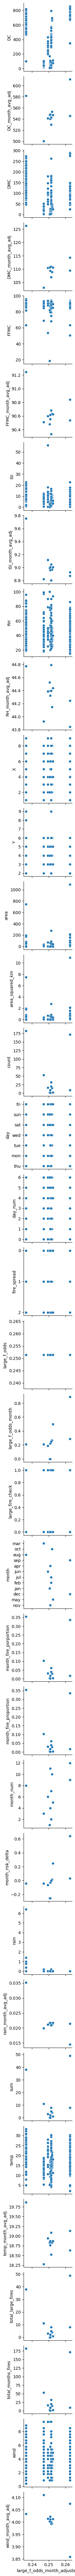

In [219]:


column_to_compare = 'large_f_odds_month_adjusted'

# Create a pairplot
sns.pairplot(bymonth_expanded, x_vars=[column_to_compare], y_vars=bymonth_expanded.columns.difference([column_to_compare]))

# Show the plot
plt.show()


In [225]:

print(bymonth_expanded.groupby('month')['large_f_odds_month_adjusted'].mean())

month
apr    0.250949
aug    0.236323
dec    0.262645
feb    0.251405
jan    0.250482
jul    0.251371
jun    0.249467
mar    0.246925
may    0.252431
nov    0.250972
oct    0.251907
sep    0.262668
Name: large_f_odds_month_adjusted, dtype: float64


In [227]:
bymonth_expanded['month'] in ['sep','aug','jul']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [229]:
summer_months = ['sep', 'aug', 'jul']

summer_df= bymonth_expanded[bymonth_expanded['month'].isin(summer_months)]

In [235]:
summer_df.corr()['large_f_odds_month'].sort_values()

C:\Users\user\AppData\Local\Temp\ipykernel_24060\998718398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  summer_df.corr()['large_f_odds_month'].sort_values()


RH_month_avg_adj              -0.996880
rain_month_avg_adj            -0.996282
ISI_month_avg_adj             -0.988910
wind_month_avg_adj            -0.984029
temp_month_avg_adj            -0.959435
DMC_month_avg_adj             -0.921841
FFMC_month_avg_adj            -0.899745
ISI                           -0.309875
DMC                           -0.307372
temp                          -0.209320
wind                          -0.151828
total_months_fires            -0.150527
count                         -0.150527
month_fire_porportion         -0.150527
month_fire_proportion         -0.150527
FFMC                          -0.143058
rain                          -0.083690
RH                            -0.081953
Y                             -0.064156
day_num                       -0.047011
X                             -0.019117
area_squared_km                0.034688
area                           0.034688
large_fire_check               0.084596
DC                             0.408961


In [247]:
bymonth['area'].std()


63.8925858938705

In [245]:
bymonth['area'].mean()

12.891598440545808

In [246]:
bymonth['area'].max()

1090.84

In [255]:
bymonth_expanded.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'month_num', 'day_num', 'area_squared_km',
       'fire_spread', 'large_fire_check', 'total_large_fires',
       'total_months_fires', 'large_f_odds_month', 'large_f_odds',
       'month_risk_delta', 'month_fire_proportion',
       'large_f_odds_month_adjusted', 'sum', 'count', 'month_fire_porportion',
       'FFMC_month_avg_adj', 'DMC_month_avg_adj', 'DC_month_avg_adj',
       'ISI_month_avg_adj', 'temp_month_avg_adj', 'RH_month_avg_adj',
       'wind_month_avg_adj', 'rain_month_avg_adj'],
      dtype='object')

In [256]:
odds_columns=['large_f_odds_month','large_f_odds_month_adjusted','large_fire_check']
bymonth_expanded[odds_columns]

,large_f_odds_month,large_f_odds_month_adjusted,large_fire_check
0,0.207547,0.246925,False
1,0.207547,0.246925,False
2,0.207547,0.246925,False
3,0.207547,0.246925,False
4,0.207547,0.246925,False
...,...,...,...
508,0.888889,0.262645,True
509,0.888889,0.262645,True
510,0.500000,0.252431,False
511,0.500000,0.252431,True
